In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Data cleaning 
# EDA
# Text preprocessing 
# Model building 
# Evaluation 
# Improvement 
# Website
# Deploy

In [3]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1") # agar r lagene ke baad bhi nahi araaha he tab encoding wala use karo 

In [4]:
df.shape

(5572, 5)

In [5]:
df.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


# Data Cleaning 

In [6]:
s = df.iloc[0:,2:]

In [7]:
s.iloc[:,0].isnull().sum()

5522

In [8]:
maindata = df.iloc[:,0:2]

In [9]:
maindata.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
maindata.rename(columns={'v1':'Target','v2':'Text'},inplace = True)

C:\Users\mynam\AppData\Roaming\Python\Python310\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
maindata.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
maindata["Target"] = encoder.fit_transform(maindata["Target"]) #ham ko 0 and spam ko 1

C:\Users\mynam\AppData\Local\Temp/ipykernel_13100/3080938110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata["Target"] = encoder.fit_transform(maindata["Target"]) #ham ko 0 and spam ko 1


In [15]:
maindata.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values 
maindata.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
# duplicate values
maindata.duplicated().sum()

403

In [18]:
# removing the duplicate values
maindata = maindata.drop_duplicates(keep="first")

In [19]:
maindata.shape

(5169, 2)

# EDA

In [20]:
maindata.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
maindata.Target.value_counts()

0    4516
1     653
Name: Target, dtype: int64

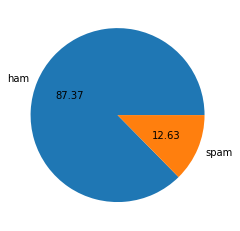

In [22]:
import matplotlib.pyplot as plt
plt.pie(maindata.Target.value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
# DAta is imbalanced 

In [24]:
import nltk

In [25]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mynam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#fetching the no. of words 

In [27]:
maindata["no._of_characters"] = maindata.Text.apply(len)

In [28]:
maindata.head()

,Target,Text,no._of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# fetch the no. of words
maindata.Text.apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [30]:
maindata.Text.apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [31]:
maindata["num_words"] = maindata.Text.apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
maindata.head()

,Target,Text,no._of_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
# finding the no. of sentence
maindata.Text.apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [34]:
maindata['num_sentence'] = maindata.Text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
maindata.head()

,Target,Text,no._of_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
maindata[["no._of_characters",'num_sentence','num_words']].describe()

,no._of_characters,num_sentence,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,18.453279
std,58.236293,1.362406,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [37]:
#hams analysis
maindata[maindata.Target == 0][["no._of_characters",'num_sentence','num_words']].describe()

,no._of_characters,num_sentence,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [38]:
maindata[maindata.Target == 0][["no._of_characters",'num_sentence','num_words']].describe()

,no._of_characters,num_sentence,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [39]:
import seaborn as sns

<AxesSubplot:xlabel='no._of_characters', ylabel='Count'>

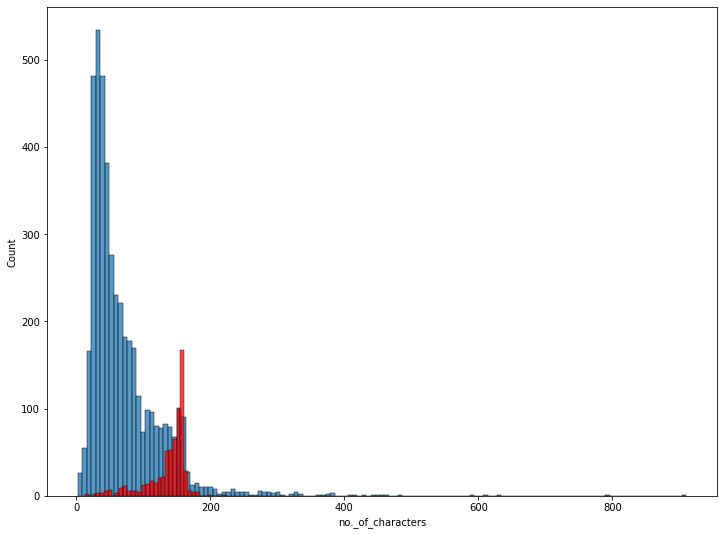

In [40]:
plt.figure(figsize=(12,9))
sns.histplot(maindata[maindata.Target == 0]['no._of_characters'])
sns.histplot(maindata[maindata.Target == 1]['no._of_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

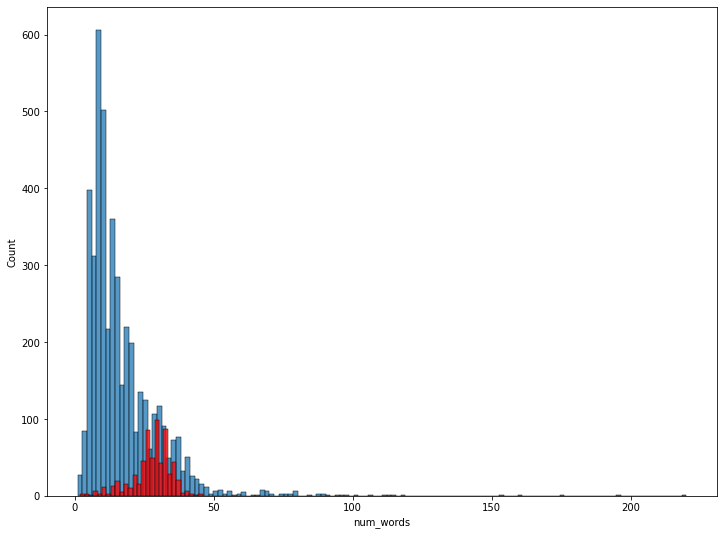

In [41]:
plt.figure(figsize=(12,9))
sns.histplot(maindata[maindata.Target == 0]['num_words'])
sns.histplot(maindata[maindata.Target == 1]['num_words'],color='red')

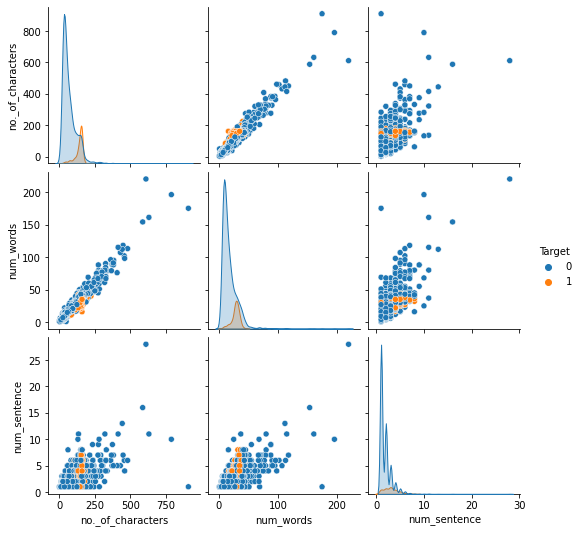

In [42]:
sns.pairplot(maindata,hue="Target")

In [43]:
maindata.corr()

,Target,no._of_characters,num_words,num_sentence
Target,1.000000,0.384717,0.262984,0.284901
no._of_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

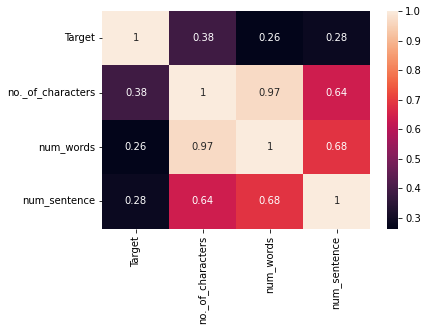

In [44]:
sns.heatmap(maindata.corr(),annot=True)

In [45]:
# here we can see that the features have high linearity amoung themselves therefore multicolinearity among
# themselves ,thus we cannot chose every features from the data in our model 
# therfore we will choose the no._of_characters as it has high colinearity with target 
# matlaab target sensitive jayada he no._of characters ke liye

# DATA PREPROCESSING
### Lower Case 
### tokenisation 
### removing special characters
### removing stop words and punctuation
### stemming

In [110]:
from nltk.corpus import stopwords
stopwords.words("english")[0:5]

['i', 'me', 'my', 'myself', 'we']

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
st.stem('dancing')

'danc'

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mynam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
def text_transform(text):
    tex = text.lower()
    tex = nltk.word_tokenize(tex)
    y = []
    for i in tex:
        if i.isalnum() == True:
            y.append(i)
            
    tex = y[:]
    y.clear()
    
    for i in tex:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    tex = y[:] 
    y.clear()
    
    for i in tex:
        y.append(st.stem(i))
    
            
    return " ".join(y)

In [54]:
print(text_transform('the alsdpodji oiiehfouh ieh% @&()?gg$%'))
print(text_transform('did u like my presentation on ML ?'))

alsdpodji oiiehfouh ieh gg
u like present ml


In [55]:
maindata.Text.apply(text_transform)[0:4]

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
Name: Text, dtype: object

In [56]:
maindata["Transformed_Data"] = maindata.Text.apply(text_transform)

In [59]:
maindata.head()

,Target,Text,no._of_characters,num_words,num_sentence,Transformed_Data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
# ab word cloud banaenge vo sabse important words he jo usko bada karke dikhaega 

In [71]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="black")

In [72]:
spam_wordcloud = wc.generate(maindata[maindata['Target']==1]['Transformed_Data'].str.cat(sep=" "))

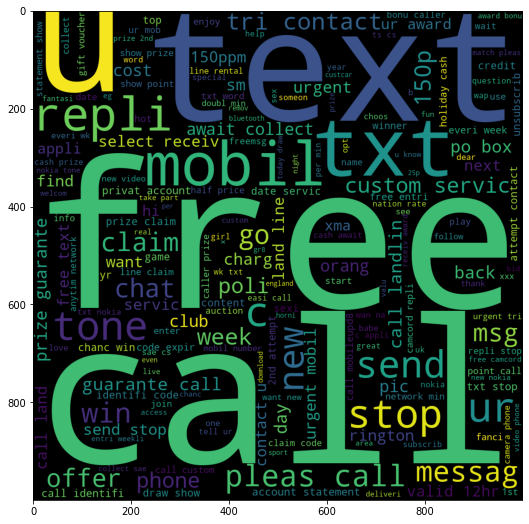

In [73]:
plt.figure(figsize=(12,9))
plt.imshow(spam_wordcloud)

In [74]:
ham_wordcloud = wc.generate(maindata[maindata['Target']==0]['Transformed_Data'].str.cat(sep=" "))

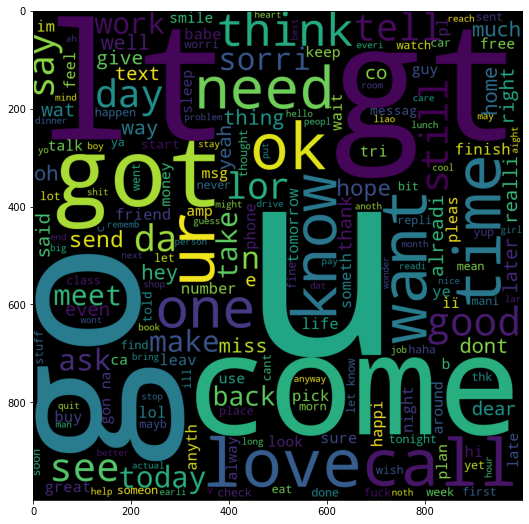

In [75]:
plt.figure(figsize=(12,9))
plt.imshow(ham_wordcloud)

In [76]:
# now lets see the top 30 words in ham and spam mesaages 

In [77]:
maindata.head()

,Target,Text,no._of_characters,num_words,num_sentence,Transformed_Data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
maindata[maindata['Target']==1]['Transformed_Data']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Data, Length: 653, dtype: object

In [82]:
maindata[maindata['Target']==1]['Transformed_Data'].tolist()[0:4]

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030']

In [85]:
spam_corpus = []
for msg in maindata[maindata['Target']==1]['Transformed_Data'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [87]:
len(spam_corpus)

9939

In [91]:
from collections import Counter  #ye filter out karne me kaam aega most common words ko
Counter(spam_corpus).most_common(30)# ye humko ek dict deta he jisme save hota he konsa word kitni baar aya he
                # ye mostcommon wala function jo sabse jayada baar occur hau he vo nikal ke dega yaha 30 toh

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [107]:
# now we will put them together in a dataframe 
pd.DataFrame(Counter(spam_corpus).most_common(35))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


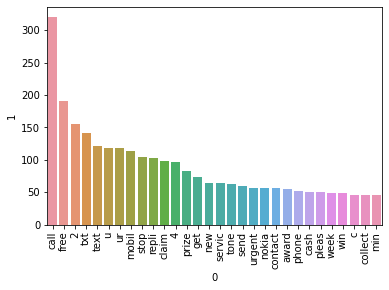

<Figure size 1440x1080 with 0 Axes>

In [102]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(35))[0],pd.DataFrame(Counter(spam_corpus).most_common(35))[1])
plt.xticks(rotation = 'vertical')
plt.figure(figsize=(20,15))
plt.show()

In [103]:
# we do all this in order to get the interpretability of the model which is working behind the secene we 
# build a spam classifier without doing all this 

In [99]:
ham_corpus = []
for msg in maindata[maindata['Target']==0]['Transformed_Data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [108]:
pd.DataFrame(Counter(ham_corpus).most_common(35))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


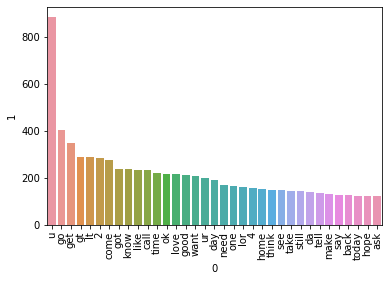

<Figure size 1440x1080 with 0 Axes>

In [109]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(35))[0],pd.DataFrame(Counter(ham_corpus).most_common(35))[1])
plt.xticks(rotation = 'vertical')
plt.figure(figsize=(20,15))
plt.show()

# MODEL BUILDING

In [111]:
# first we will build the model based on NAive bayes as there is a concerned in ML community that Navie bayes model 
# generally perform better on word based data 

In [112]:
# Now we have to first vectorise the text inorder to give it to our model
# 1. bag of words : jisme haam most frequently occuring words ka column banate he aur vo no. of frequent 
# occuring banjata he vector 
# 2. Tfidf  3. wordtovec

In [ ]:
# first we will do by bag of words to vectorize
